In [1]:
import torch, torchvision
import os
import random
import logging #Se renseigner, par encore utilisé
import dataset
import metrics

import constants as cst
import numpy as np
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

import loss_fn
from unet import UNET

In [2]:
def predict_img(model, image, device, transform, out_threshold=0.5):
    with torch.no_grad():
        x = image
        logits = model(x.to(device))
        logits = transform(logits)
        y_pred = nn.Softmax(dim=1)(logits)
        proba = y_pred.detach().cpu().squeeze(0).numpy()[1, :, :]
        return proba > out_threshold

In [3]:
TERM = "OC1"
EXTRA = "ALL"

DATASET = "/notebooks/images"
MASKS = "/notebooks/oc1"

Training set length: 80
Validation set length: 20
Testing set length: 19
Validation loss before training: 0.7872795462608337
Starting epoch 1. Trained: 0.26515333673451097. Validation: 0.3280093610286713.
Starting epoch 2. Trained: 0.0032420133764389904. Validation: 0.016146751306951045.
Starting epoch 3. Trained: 0.001975376851623878. Validation: 0.007548494357615709.
Starting epoch 4. Trained: 0.0018807368294801563. Validation: 0.0017241512658074498.
Starting epoch 5. Trained: 0.0015070419409312307. Validation: 0.0015329945599660277.
Starting epoch 6. Trained: 0.0013325458450708539. Validation: 0.0012770145665854215.
Starting epoch 7. Trained: 0.001225079156574793. Validation: 0.0012314436258748173.
Starting epoch 8. Trained: 0.001204130527912639. Validation: 0.0014096485218033194.
Starting epoch 9. Trained: 0.0011710631632013246. Validation: 0.0013542994973249733.
Starting epoch 10. Trained: 0.0010595319385174663. Validation: 0.0011549515300430357.
Starting epoch 11. Trained: 0.0010

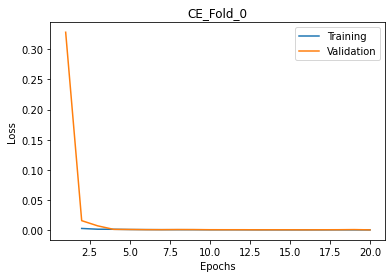

Training set length: 80
Validation set length: 20
Testing set length: 19
Validation loss before training: 0.7545586228370667
Starting epoch 1. Trained: 0.290345885255374. Validation: 0.11872250437736512.
Starting epoch 2. Trained: 0.0027090608258731664. Validation: 0.009676863346248865.
Starting epoch 3. Trained: 0.0017168488760944457. Validation: 0.00415127077139914.
Starting epoch 4. Trained: 0.0014741550432518125. Validation: 0.001984294899739325.
Starting epoch 5. Trained: 0.0014215601346222683. Validation: 0.0015432757558301092.
Starting epoch 6. Trained: 0.0013926419167546555. Validation: 0.0015568953473120927.
Starting epoch 7. Trained: 0.0013235719583462925. Validation: 0.0014005975099280477.
Starting epoch 8. Trained: 0.001208196420338936. Validation: 0.0013927189982496202.
Starting epoch 9. Trained: 0.0011846340785268694. Validation: 0.0014448072062805295.
Starting epoch 10. Trained: 0.001121193525614217. Validation: 0.0014109348645433783.
Starting epoch 11. Trained: 0.001077

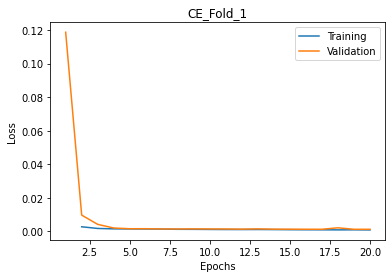

Training set length: 80
Validation set length: 20
Testing set length: 19
Validation loss before training: 0.6628336906433105
Starting epoch 1. Trained: 0.20458976393565537. Validation: 0.0988164260983467.
Starting epoch 2. Trained: 0.0024654244363773612. Validation: 0.0028009166941046714.
Starting epoch 3. Trained: 0.0016569566912949085. Validation: 0.0024439226603135467.
Starting epoch 4. Trained: 0.0014498956908937544. Validation: 0.0016392992110922933.
Starting epoch 5. Trained: 0.0013015246513532475. Validation: 0.0015630166046321392.
Starting epoch 6. Trained: 0.00116591333062388. Validation: 0.0013735678745433687.
Starting epoch 7. Trained: 0.0012774780538165943. Validation: 0.003377970727160573.
Starting epoch 8. Trained: 0.001160704539506696. Validation: 0.0018004440004006027.
Starting epoch 9. Trained: 0.001054910323000513. Validation: 0.0014911449514329433.
Starting epoch 10. Trained: 0.0010725213011028244. Validation: 0.0012763079488649965.
Starting epoch 11. Trained: 0.0009

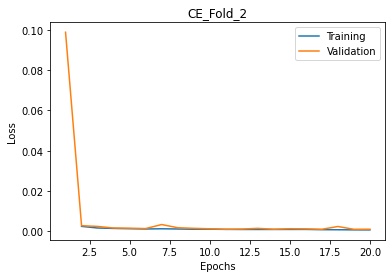

Training set length: 80
Validation set length: 20
Testing set length: 19
Validation loss before training: 0.7038349747657776
Starting epoch 1. Trained: 0.21293967190431431. Validation: 0.4572584807872772.
Starting epoch 2. Trained: 0.0032415432506240904. Validation: 0.007932391948997974.
Starting epoch 3. Trained: 0.002515395957743749. Validation: 0.0029939965810626746.
Starting epoch 4. Trained: 0.0019333012285642325. Validation: 0.0017035327851772307.
Starting epoch 5. Trained: 0.001866855873959139. Validation: 0.0018300254363566638.
Starting epoch 6. Trained: 0.001615872693946585. Validation: 0.0013441042276099325.
Starting epoch 7. Trained: 0.0014042316295672208. Validation: 0.0012837440008297563.
Starting epoch 8. Trained: 0.0013801291352137923. Validation: 0.001216303347609937.
Starting epoch 9. Trained: 0.0013197440712247044. Validation: 0.0011721364688128233.
Starting epoch 10. Trained: 0.0012601443653693424. Validation: 0.0010700672050006689.
Starting epoch 11. Trained: 0.0011

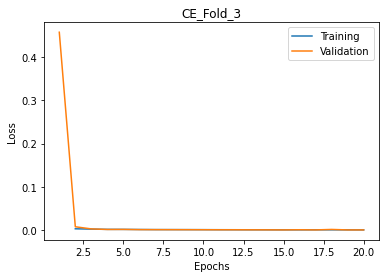

Training set length: 80
Validation set length: 20
Testing set length: 19
Validation loss before training: 0.7443933963775635
Starting epoch 1. Trained: 0.2606255577644333. Validation: 0.07682556957006455.
Starting epoch 2. Trained: 0.002461653097998351. Validation: 0.16066034734249116.
Starting epoch 3. Trained: 0.001750107656698674. Validation: 0.004165601311251521.
Starting epoch 4. Trained: 0.0015525799011811615. Validation: 0.0019980335840955377.
Starting epoch 5. Trained: 0.0014801659213844686. Validation: 0.0015174412634223699.
Starting epoch 6. Trained: 0.001431181773659773. Validation: 0.0015768085606396199.
Starting epoch 7. Trained: 0.0013388386229053139. Validation: 0.001352454535663128.
Starting epoch 8. Trained: 0.0012756809126585722. Validation: 0.0015049757901579141.
Starting epoch 9. Trained: 0.0011715222732163965. Validation: 0.0012015902670100332.
Starting epoch 10. Trained: 0.001108263898640871. Validation: 0.0012960821622982621.
Starting epoch 11. Trained: 0.0011174

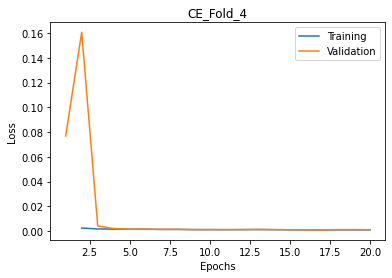

-------------------------
-----------END-----------
-------------------------
Best fold: 4
Best validation loss: 0.000652698811609298
Best epoch: 19
Mean val of folds: 0.0009562431788071991
Best vals for each fold:
Fold :1 - Val: 0.0009128871490247548
Fold :2 - Val: 0.001216004404705018
Fold :3 - Val: 0.0010130108101293444
Fold :4 - Val: 0.000652698811609298
Fold :5 - Val: 0.00098661471856758


In [4]:
random.seed(cst.SEED)
torch.manual_seed(cst.SEED)
np.random.seed(cst.SEED)

SIZE = (384, 512)

DEVICE_NAME = "cpu"
if torch.cuda.is_available():
    DEVICE_NAME = 'cuda:0'
DEVICE = torch.device(DEVICE_NAME)

transform = transforms.Compose([transforms.Resize(SIZE),
                                transforms.Pad((0, 64, 0, 64))])
untransform = transforms.Compose([transforms.CenterCrop(SIZE),
                                 transforms.Resize((1932, 2576))])

model = UNET(3, 2)
overall_best_model = UNET(3, 2)
overall_best_model = model
model.to(DEVICE)

best_fold = 0
overall_best = 10
best_fold_epoch = 0
fold_best_vals = []

image_folder = DATASET
mask_folder = MASKS


for fold in range(cst.FOLDS):
    # Datasets and loaders
    training_set = dataset.ZebrafishDataset_KFold_v2(image_folder,
                                                  mask_folder,
                                                  actual_fold=fold,
                                                  dataset="train",
                                                  folds=5)
    validation_set = dataset.ZebrafishDataset_KFold_v2(image_folder,
                                                    mask_folder,
                                                    actual_fold=fold,
                                                    dataset="validate",
                                                    folds=5)
    testing_set = dataset.ZebrafishDataset_KFold_v2(image_folder,
                                                 mask_folder,
                                                 actual_fold=fold,
                                                 dataset="test",
                                                 folds=5)

    training_loader = torch.utils.data.DataLoader(training_set,
                                                  batch_size=cst.BATCH_SIZE,
                                                  shuffle=True,
                                                  num_workers=cst.WORKERS)

    validation_loader = torch.utils.data.DataLoader(validation_set,
                                                    batch_size=cst.BATCH_SIZE,
                                                    shuffle=True,
                                                    num_workers=cst.WORKERS)

    testing_loader = torch.utils.data.DataLoader(testing_set,
                                                 batch_size=1,
                                                 shuffle=True,
                                                 num_workers=cst.WORKERS)

    # (Channels x Classes)
    model = UNET(3, 2)
    best_model = UNET(3, 2)
    best_model = model
    model.to(DEVICE)

    criterion = nn.CrossEntropyLoss()
    criterion_string = "CE"

    if cst.LOSS == "Dice":
        print("Dice")
        criterion = loss_fn.DiceLoss()
        criterion_string = "DCE"
    if cst.LOSS == "IOU":
        print("IOU")
        criterion = loss_fn.IoULoss()
        criterion_string = "IOU"
    if cst.LOSS == "Tversky":
        print("Twersky")
        criterion = loss_fn.TverskyLoss()
        criterion_string = "Tversky"

    optimiser = torch.optim.Adam(model.parameters(), lr=cst.LEARNING_RATE, weight_decay=cst.WEIGHT_DECAY)
    optimiser_string = "ADAM" + "_" + "LR" + str(cst.LEARNING_RATE) + "_" + "WD" + str(cst.WEIGHT_DECAY)

    if cst.OPTIMIZER == "SGD":
        optimizer = torch.optim.SGD(model.parameters(),
                                    lr=cst.LEARNING_RATE,
                                    momentum=cst.MOMENTUM,
                                    weight_decay=cst.WEIGHT_DECAY)
        optimiser_string = "SGD" + "_" + "LR" + str(cst.LEARNING_RATE) + "_" + "M" + str(cst.MOMENTUM)
        optimiser_string += "_" + "WD" + str(cst.WEIGHT_DECAY)

    model.eval()
    with torch.no_grad():
        val_loss = []
        for images, masks, names in validation_loader:
            images = transform(images)
            outputs = model(images.to(DEVICE))
            outputs = untransform(outputs)

            masks = masks.type(torch.LongTensor)
            masks = torch.squeeze(masks, 1)

            if cst.LOSS == "CE":
                vloss = criterion(outputs, masks.to(DEVICE))
            else:
                vloss = criterion(outputs, F.one_hot(masks, 2).permute(0, 3, 1, 2).float())

            loss = vloss.detach().item()
            val_loss.append(loss)

        loss = np.mean(val_loss)
        print("Validation loss before training: {}".format(loss))

    best_val = loss
    best_epoch = 0

    params_string = "Params" + "_" + "Epoch" + str(cst.EPOCHS) + "_" + "BS" + str(cst.BATCH_SIZE)
    params_string += "_" + "W" + str(cst.WORKERS)

    epochs_train_losses = []
    epochs_val_losses = []
    for i in range(cst.EPOCHS):
        print("Starting epoch {}".format(i+1), end=". ")

        model.train()
        train_loss = []
        for images, masks, names in training_loader:
            images = transform(images)
            outputs = model(images.to(DEVICE))
            outputs = untransform(outputs)

            masks = masks.type(torch.LongTensor)
            masks = torch.squeeze(masks, 1)

            if cst.LOSS == "CE":
                tloss = criterion(outputs, masks.to(DEVICE))
            else:
                tloss = criterion(outputs, F.one_hot(masks, 2).permute(0, 3, 1, 2).float())

            loss = tloss.detach().item()
            train_loss.append(loss)

            optimiser.zero_grad()
            tloss.backward()
            optimiser.step()

        #print("d")
        loss = np.mean(train_loss)
        epochs_train_losses.append(loss)
        print("Trained: {}".format(loss), end=". ")

        model.eval()
        with torch.no_grad():
            val_loss = []
            for images, masks, names in validation_loader:
                images = transform(images)
                outputs = model(images.to(DEVICE))
                outputs = untransform(outputs)

                masks = masks.type(torch.LongTensor)
                masks = torch.squeeze(masks, 1)

                if cst.LOSS == "CE":
                    vloss = criterion(outputs, masks.to(DEVICE))
                else:
                    vloss = criterion(outputs, F.one_hot(masks, 2).permute(0, 3, 1, 2).float())

                loss = vloss.detach().item()
                val_loss.append(loss)

            loss = np.mean(val_loss)
            epochs_val_losses.append(loss)
            print("Validation: {}.".format(loss))

            if loss < best_val:
                best_val = loss
                best_model = model
                best_epoch = i+1

    #print("Training: {}".format(epochs_train_losses))
    #print("Validating: {}".format(epochs_val_losses))
    print("Best score: {}".format(best_val))

    #model_filepath = os.path.join(cst.MODEL, model_name)
    #best_filepath = os.path.join(cst.MODEL, best_name)
    #torch.save(model.state_dict(), model_filepath)
    #torch.save(best_model.state_dict(), best_filepath)

    fold_best_vals.append(best_val)
    
    if best_val < overall_best:
        overall_best = best_val
        overall_best_model = best_model
        best_fold_epoch = best_epoch
        best_fold = fold

    print("--------------------")
    print("Fold: {}".format(fold))
    print("Last val: {}".format(loss))
    print("Best val: {}".format(best_val))
    print("--------------------")


    
    index = [i+1 for i in range(cst.EPOCHS)]
    plt.plot(index[1:], epochs_train_losses[1:], label="Training")
    plt.plot(index, epochs_val_losses, label="Validation")
    plt.title(str(cst.LOSS) + "_Fold_" + str(fold)) 
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    #plot_name = name + ".png"
    #plt.savefig(plot_name)
    

name = TERM + "_" + EXTRA + "_Fold" + str(best_fold) +  "_EPOCH" + str(best_fold_epoch) + "_Val" + str(best_val)
name = name + criterion_string + "_" + optimiser_string + "_" + params_string
model_name = name + ".pth"
best_filepath = os.path.join(cst.MODEL, model_name)
#torch.save(overall_best_model.state_dict(), best_filepath)

print("-------------------------")
print("-----------END-----------")
print("-------------------------")
print("Best fold: {}".format(best_fold+1))
print("Best validation loss: {}".format(overall_best))
print("Best epoch: {}".format(best_fold_epoch))
print("Mean val of folds: {}".format(np.mean(fold_best_vals)))
print("Best vals for each fold:")
a = 0
for item in fold_best_vals:
    print("Fold :{}".format(a+1), end=" - ")
    print("Val: {}".format(item))
    a=a+1

In [5]:
tps = 0
precisions = []
recalls = []
F1s = []
IOUs = []

eval_model = UNET(3, 2)
eval_model = overall_best_model

eval_model.eval()
for image, mask, name in testing_loader:
    image_name = name[0]
    prediction = predict_img(model, transform(image), DEVICE, untransform, out_threshold=cst.THRESHOLD)
    pred = torch.from_numpy(prediction)
    
    precisions.append(metrics.precision(pred, mask))
    recalls.append(metrics.recall(pred, mask))
    F1s.append(metrics.F1Score(pred, mask))
    IOUs.append(metrics.IOUScore(pred, mask))
    
confidence = 0.9
print("Name of the run: {}".format(TERM + "_" + "Fold_" + str(best_fold)))
print("Precision: {}".format(np.mean(precisions)))
print("90% CI: {}".format(np.percentile(precisions, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(precisions), np.max(precisions))
print()

print("Recall: {}".format(np.mean(recalls)))
print("90% CI: {}".format(np.percentile(recalls, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(recalls), np.max(recalls))
print()
      
print("F1/Dice score: {}".format(np.mean(F1s)))
print("90% CI: {}".format(np.percentile(F1s, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(F1s), np.max(F1s))
print()

print("IoU: {}".format(np.mean(IOUs)))
print("90% CI: {}".format(np.percentile(IOUs, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(IOUs), np.max(IOUs))

Name of the run: OC1_Fold_3
Precision: 0.7868987977210865
90% CI: [0. 1.]
Min, max: 0.0 0.9999999999957824

Recall: 0.21843896236144209
90% CI: [0.         0.43197983]
Min, max: 0.0 0.6441919191902925

F1/Dice score: 0.32732463065174716
90% CI: [0.         0.59943375]
Min, max: 0.0 0.7747911921020884

IoU: 0.21772750678629246
90% CI: [0.         0.43079812]
Min, max: 0.0 0.6323748140787497


In [6]:
# ---------------------------------------------------------------------------------------------

In [7]:
TERM = "OC2"
EXTRA = "ALL"

DATASET = "/notebooks/images"
MASKS = "/notebooks/oc2"

Training set length: 80
Validation set length: 21
Testing set length: 20
Validation loss before training: 0.7872868776321411
Starting epoch 1. Trained: 0.2695730865234509. Validation: 0.023918127330640953.
Starting epoch 2. Trained: 0.003974084829678759. Validation: 0.007623711678509911.
Starting epoch 3. Trained: 0.0027959940198343247. Validation: 0.003565456601791084.
Starting epoch 4. Trained: 0.002116583212045953. Validation: 0.002288086669674764.
Starting epoch 5. Trained: 0.001605748530710116. Validation: 0.0016677947132848203.
Starting epoch 6. Trained: 0.0014182404207531362. Validation: 0.0016405379283241928.
Starting epoch 7. Trained: 0.0013135091488948093. Validation: 0.001485791717035075.
Starting epoch 8. Trained: 0.0012022136128507555. Validation: 0.0013748142907085519.
Starting epoch 9. Trained: 0.0011469675082480535. Validation: 0.0014550226818149288.
Starting epoch 10. Trained: 0.0011202067835256457. Validation: 0.0018206075765192509.
Starting epoch 11. Trained: 0.00113

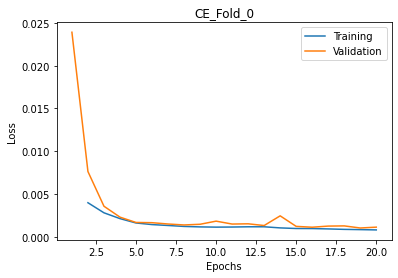

Training set length: 81
Validation set length: 20
Testing set length: 20
Validation loss before training: 0.7545601606369019
Starting epoch 1. Trained: 0.2750789365465088. Validation: 0.18530098497867584.
Starting epoch 2. Trained: 0.002324575375366424. Validation: 0.004818311193957925.
Starting epoch 3. Trained: 0.0017603873219784526. Validation: 0.006488342117518186.
Starting epoch 4. Trained: 0.0016167130254741227. Validation: 0.003449372050818056.
Starting epoch 5. Trained: 0.00143874420540496. Validation: 0.003589229751378298.
Starting epoch 6. Trained: 0.0013930731220170856. Validation: 0.0034381747944280507.
Starting epoch 7. Trained: 0.0013697012771098386. Validation: 0.0032058329205028714.
Starting epoch 8. Trained: 0.001244583435999673. Validation: 0.0026077074347995222.
Starting epoch 9. Trained: 0.0011678707946668424. Validation: 0.0032206453499384223.
Starting epoch 10. Trained: 0.0012371117204782508. Validation: 0.003266859706491232.
Starting epoch 11. Trained: 0.00116494

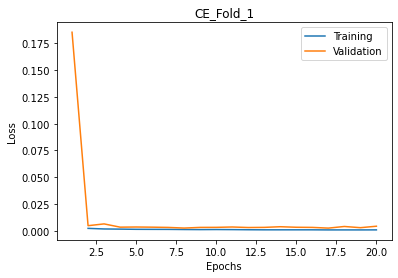

Training set length: 81
Validation set length: 20
Testing set length: 20
Validation loss before training: 0.6628338932991028
Starting epoch 1. Trained: 0.19535932890583008. Validation: 0.005751961003988981.
Starting epoch 2. Trained: 0.0025602779018559624. Validation: 0.004288192791864276.
Starting epoch 3. Trained: 0.0018845591195193784. Validation: 0.0016777252545580267.
Starting epoch 4. Trained: 0.0017239086806685442. Validation: 0.0019033685326576232.
Starting epoch 5. Trained: 0.0017392111698254233. Validation: 0.0013682135613635182.
Starting epoch 6. Trained: 0.0015464728930965066. Validation: 0.001259554922580719.
Starting epoch 7. Trained: 0.0015076863596082798. Validation: 0.0016479961341246963.
Starting epoch 8. Trained: 0.0014084985790153344. Validation: 0.0012616116553544998.
Starting epoch 9. Trained: 0.0012252041487954557. Validation: 0.0011723906616680324.
Starting epoch 10. Trained: 0.0011487868531341. Validation: 0.0013961270917207003.
Starting epoch 11. Trained: 0.00

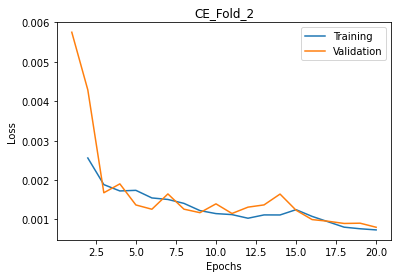

Training set length: 81
Validation set length: 20
Testing set length: 20
Validation loss before training: 0.7038373351097107
Starting epoch 1. Trained: 0.20445880613156728. Validation: 0.13752705305814744.
Starting epoch 2. Trained: 0.0028898099248874046. Validation: 0.006483156513422727.
Starting epoch 3. Trained: 0.0023520625129874262. Validation: 0.0027527722995728254.
Starting epoch 4. Trained: 0.002163867854202787. Validation: 0.001976132160052657.
Starting epoch 5. Trained: 0.0019573589587318046. Validation: 0.0017691865097731352.
Starting epoch 6. Trained: 0.001750406892304974. Validation: 0.0015820808010175824.
Starting epoch 7. Trained: 0.0016501773913790072. Validation: 0.00165853314101696.
Starting epoch 8. Trained: 0.0015610726716529047. Validation: 0.0014966433867812158.
Starting epoch 9. Trained: 0.0013737682546932427. Validation: 0.0014867524383589624.
Starting epoch 10. Trained: 0.001318614910511921. Validation: 0.0011648653075098992.
Starting epoch 11. Trained: 0.00134

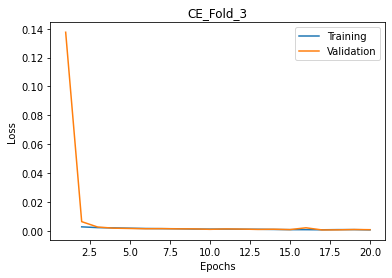

Training set length: 81
Validation set length: 20
Testing set length: 20
Validation loss before training: 0.7443878531455994
Starting epoch 1. Trained: 0.24915313373674594. Validation: 0.00736685711890459.
Starting epoch 2. Trained: 0.002960130655472832. Validation: 0.0023925380315631627.
Starting epoch 3. Trained: 0.0020160262938588858. Validation: 0.0021763304015621544.
Starting epoch 4. Trained: 0.0018518372172755854. Validation: 0.0018277241149917244.
Starting epoch 5. Trained: 0.001749643484973127. Validation: 0.0017303897067904473.
Starting epoch 6. Trained: 0.001559778912148128. Validation: 0.0013810246950015427.
Starting epoch 7. Trained: 0.0014450654908571216. Validation: 0.0013200046727433802.
Starting epoch 8. Trained: 0.0014915897433335583. Validation: 0.0019411814864724874.
Starting epoch 9. Trained: 0.001720231722131194. Validation: 0.001798487431369722.
Starting epoch 10. Trained: 0.001404879586992874. Validation: 0.0015384071972221135.
Starting epoch 11. Trained: 0.0012

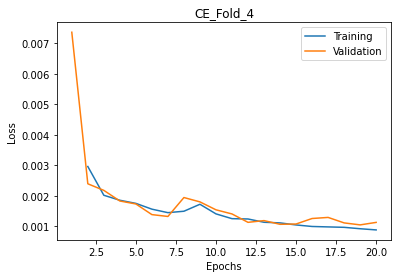

-------------------------
-----------END-----------
-------------------------
Best fold: 4
Best validation loss: 0.0007664321921765805
Best epoch: 17
Mean val of folds: 0.001238508609433969
Best vals for each fold:
Fold :1 - Val: 0.0010193029108146827
Fold :2 - Val: 0.0025611996883526445
Fold :3 - Val: 0.0008019682951271534
Fold :4 - Val: 0.0007664321921765805
Fold :5 - Val: 0.0010436399606987834


In [8]:
random.seed(cst.SEED)
torch.manual_seed(cst.SEED)
np.random.seed(cst.SEED)

SIZE = (384, 512)

DEVICE_NAME = "cpu"
if torch.cuda.is_available():
    DEVICE_NAME = 'cuda:0'
DEVICE = torch.device(DEVICE_NAME)

transform = transforms.Compose([transforms.Resize(SIZE),
                                transforms.Pad((0, 64, 0, 64))])
untransform = transforms.Compose([transforms.CenterCrop(SIZE),
                                 transforms.Resize((1932, 2576))])

model = UNET(3, 2)
overall_best_model = UNET(3, 2)
overall_best_model = model
model.to(DEVICE)

best_fold = 0
overall_best = 10
best_fold_epoch = 0
fold_best_vals = []

image_folder = DATASET
mask_folder = MASKS


for fold in range(cst.FOLDS):
    # Datasets and loaders
    training_set = dataset.ZebrafishDataset_KFold_v2(image_folder,
                                                  mask_folder,
                                                  actual_fold=fold,
                                                  dataset="train",
                                                  folds=5)
    validation_set = dataset.ZebrafishDataset_KFold_v2(image_folder,
                                                    mask_folder,
                                                    actual_fold=fold,
                                                    dataset="validate",
                                                    folds=5)
    testing_set = dataset.ZebrafishDataset_KFold_v2(image_folder,
                                                 mask_folder,
                                                 actual_fold=fold,
                                                 dataset="test",
                                                 folds=5)

    training_loader = torch.utils.data.DataLoader(training_set,
                                                  batch_size=cst.BATCH_SIZE,
                                                  shuffle=True,
                                                  num_workers=cst.WORKERS)

    validation_loader = torch.utils.data.DataLoader(validation_set,
                                                    batch_size=cst.BATCH_SIZE,
                                                    shuffle=True,
                                                    num_workers=cst.WORKERS)

    testing_loader = torch.utils.data.DataLoader(testing_set,
                                                 batch_size=1,
                                                 shuffle=True,
                                                 num_workers=cst.WORKERS)

    # (Channels x Classes)
    model = UNET(3, 2)
    best_model = UNET(3, 2)
    best_model = model
    model.to(DEVICE)

    criterion = nn.CrossEntropyLoss()
    criterion_string = "CE"

    if cst.LOSS == "Dice":
        print("Dice")
        criterion = loss_fn.DiceLoss()
        criterion_string = "DCE"
    if cst.LOSS == "IOU":
        print("IOU")
        criterion = loss_fn.IoULoss()
        criterion_string = "IOU"
    if cst.LOSS == "Tversky":
        print("Twersky")
        criterion = loss_fn.TverskyLoss()
        criterion_string = "Tversky"

    optimiser = torch.optim.Adam(model.parameters(), lr=cst.LEARNING_RATE, weight_decay=cst.WEIGHT_DECAY)
    optimiser_string = "ADAM" + "_" + "LR" + str(cst.LEARNING_RATE) + "_" + "WD" + str(cst.WEIGHT_DECAY)

    if cst.OPTIMIZER == "SGD":
        optimizer = torch.optim.SGD(model.parameters(),
                                    lr=cst.LEARNING_RATE,
                                    momentum=cst.MOMENTUM,
                                    weight_decay=cst.WEIGHT_DECAY)
        optimiser_string = "SGD" + "_" + "LR" + str(cst.LEARNING_RATE) + "_" + "M" + str(cst.MOMENTUM)
        optimiser_string += "_" + "WD" + str(cst.WEIGHT_DECAY)

    model.eval()
    with torch.no_grad():
        val_loss = []
        for images, masks, names in validation_loader:
            images = transform(images)
            outputs = model(images.to(DEVICE))
            outputs = untransform(outputs)

            masks = masks.type(torch.LongTensor)
            masks = torch.squeeze(masks, 1)

            if cst.LOSS == "CE":
                vloss = criterion(outputs, masks.to(DEVICE))
            else:
                vloss = criterion(outputs, F.one_hot(masks, 2).permute(0, 3, 1, 2).float())

            loss = vloss.detach().item()
            val_loss.append(loss)

        loss = np.mean(val_loss)
        print("Validation loss before training: {}".format(loss))

    best_val = loss
    best_epoch = 0

    params_string = "Params" + "_" + "Epoch" + str(cst.EPOCHS) + "_" + "BS" + str(cst.BATCH_SIZE)
    params_string += "_" + "W" + str(cst.WORKERS)

    epochs_train_losses = []
    epochs_val_losses = []
    for i in range(cst.EPOCHS):
        print("Starting epoch {}".format(i+1), end=". ")

        model.train()
        train_loss = []
        for images, masks, names in training_loader:
            images = transform(images)
            outputs = model(images.to(DEVICE))
            outputs = untransform(outputs)

            masks = masks.type(torch.LongTensor)
            masks = torch.squeeze(masks, 1)

            if cst.LOSS == "CE":
                tloss = criterion(outputs, masks.to(DEVICE))
            else:
                tloss = criterion(outputs, F.one_hot(masks, 2).permute(0, 3, 1, 2).float())

            loss = tloss.detach().item()
            train_loss.append(loss)

            optimiser.zero_grad()
            tloss.backward()
            optimiser.step()

        #print("d")
        loss = np.mean(train_loss)
        epochs_train_losses.append(loss)
        print("Trained: {}".format(loss), end=". ")

        model.eval()
        with torch.no_grad():
            val_loss = []
            for images, masks, names in validation_loader:
                images = transform(images)
                outputs = model(images.to(DEVICE))
                outputs = untransform(outputs)

                masks = masks.type(torch.LongTensor)
                masks = torch.squeeze(masks, 1)

                if cst.LOSS == "CE":
                    vloss = criterion(outputs, masks.to(DEVICE))
                else:
                    vloss = criterion(outputs, F.one_hot(masks, 2).permute(0, 3, 1, 2).float())

                loss = vloss.detach().item()
                val_loss.append(loss)

            loss = np.mean(val_loss)
            epochs_val_losses.append(loss)
            print("Validation: {}.".format(loss))

            if loss < best_val:
                best_val = loss
                best_model = model
                best_epoch = i+1

    #print("Training: {}".format(epochs_train_losses))
    #print("Validating: {}".format(epochs_val_losses))
    print("Best score: {}".format(best_val))

    #model_filepath = os.path.join(cst.MODEL, model_name)
    #best_filepath = os.path.join(cst.MODEL, best_name)
    #torch.save(model.state_dict(), model_filepath)
    #torch.save(best_model.state_dict(), best_filepath)

    fold_best_vals.append(best_val)
    
    if best_val < overall_best:
        overall_best = best_val
        overall_best_model = best_model
        best_fold_epoch = best_epoch
        best_fold = fold

    print("--------------------")
    print("Fold: {}".format(fold))
    print("Last val: {}".format(loss))
    print("Best val: {}".format(best_val))
    print("--------------------")


    
    index = [i+1 for i in range(cst.EPOCHS)]
    plt.plot(index[1:], epochs_train_losses[1:], label="Training")
    plt.plot(index, epochs_val_losses, label="Validation")
    plt.title(str(cst.LOSS) + "_Fold_" + str(fold)) 
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    #plot_name = name + ".png"
    #plt.savefig(plot_name)
    

name = TERM + "_" + EXTRA + "_Fold" + str(best_fold) +  "_EPOCH" + str(best_fold_epoch) + "_Val" + str(best_val)
name = name + criterion_string + "_" + optimiser_string + "_" + params_string
model_name = name + ".pth"
best_filepath = os.path.join(cst.MODEL, model_name)
#torch.save(overall_best_model.state_dict(), best_filepath)

print("-------------------------")
print("-----------END-----------")
print("-------------------------")
print("Best fold: {}".format(best_fold+1))
print("Best validation loss: {}".format(overall_best))
print("Best epoch: {}".format(best_fold_epoch))
print("Mean val of folds: {}".format(np.mean(fold_best_vals)))
print("Best vals for each fold:")
a = 0
for item in fold_best_vals:
    print("Fold :{}".format(a+1), end=" - ")
    print("Val: {}".format(item))
    a=a+1

In [9]:
tps = 0
precisions = []
recalls = []
F1s = []
IOUs = []

eval_model = UNET(3, 2)
eval_model = overall_best_model

eval_model.eval()
for image, mask, name in testing_loader:
    image_name = name[0]
    prediction = predict_img(model, transform(image), DEVICE, untransform, out_threshold=cst.THRESHOLD)
    pred = torch.from_numpy(prediction)
    
    precisions.append(metrics.precision(pred, mask))
    recalls.append(metrics.recall(pred, mask))
    F1s.append(metrics.F1Score(pred, mask))
    IOUs.append(metrics.IOUScore(pred, mask))
    
confidence = 0.9
print("Name of the run: {}".format(TERM + "_" + "Fold_" + str(best_fold)))
print("Precision: {}".format(np.mean(precisions)))
print("90% CI: {}".format(np.percentile(precisions, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(precisions), np.max(precisions))
print()

print("Recall: {}".format(np.mean(recalls)))
print("90% CI: {}".format(np.percentile(recalls, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(recalls), np.max(recalls))
print()
      
print("F1/Dice score: {}".format(np.mean(F1s)))
print("90% CI: {}".format(np.percentile(F1s, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(F1s), np.max(F1s))
print()

print("IoU: {}".format(np.mean(IOUs)))
print("90% CI: {}".format(np.percentile(IOUs, [100*(1-confidence)/2,100*(1-(1-confidence)/2)])))
print("Min, max:", np.min(IOUs), np.max(IOUs))

Name of the run: OC2_Fold_3
Precision: 0.7030509251334118
90% CI: [0. 1.]
Min, max: 0.0 0.9999999999961301

Recall: 0.20754433676354472
90% CI: [0.        0.4837487]
Min, max: 0.0 0.5169811320744963

F1/Dice score: 0.302381541544162
90% CI: [0.         0.65196453]
Min, max: 0.0 0.6803227808805955

IoU: 0.204378598483936
90% CI: [0.         0.48367575]
Min, max: 0.0 0.5155221072426801
